# Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, mean_squared_error, r2_score
import warnings
warnings.filterwarnings('ignore')
pd.set_option("display.max_colwidth",None)
import plotly.io as pio
pio.renderers.default = 'notebook' 
pio.renderers.default = 'iframe_connected'


# Project :
## Walmart Sales Predictive Analysis

In [24]:
df=pd.read_csv(r"c:\Users\user\Desktop\Kaggle Datasets\Walmart_sales_analysis.csv")

# Data Info

In [25]:
df.head()

,Store_Number,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,2/5/2010,"1,643,691",0,42.31,2.572,211,8.106
1,1,2/12/2010,"1,641,957",1,38.51,2.548,211,8.106
2,1,2/19/2010,"1,611,968",0,39.93,2.514,211,8.106
3,1,2/26/2010,"1,409,728",0,46.63,2.561,211,8.106
4,1,3/5/2010,"1,554,807",0,46.50,2.625,211,8.106


In [26]:
df.shape

(6435, 8)

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store_Number  6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   object 
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6    CPI          6435 non-null   int64  
 7   Unemployment  6435 non-null   float64
dtypes: float64(3), int64(3), object(2)
memory usage: 402.3+ KB


<Axes: >

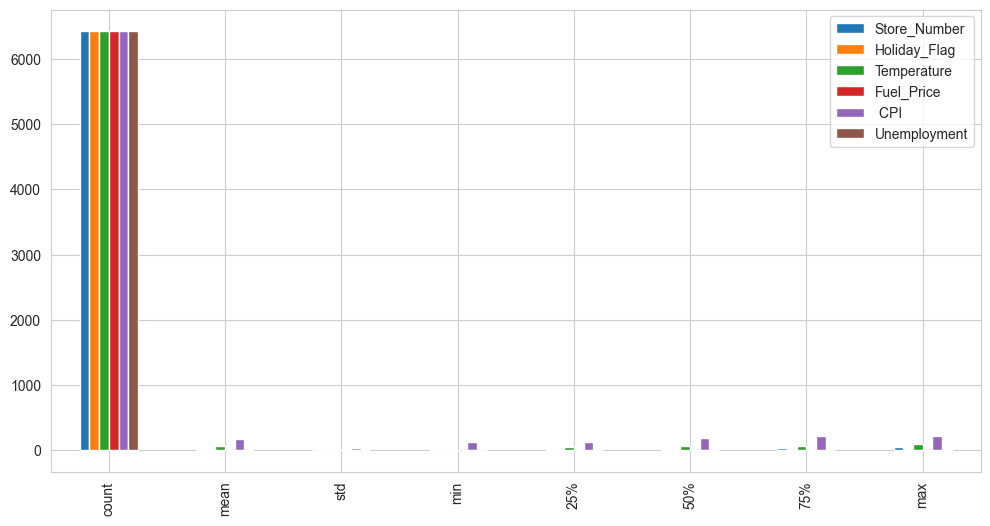

In [28]:
df.describe().plot(kind="bar",figsize=(12,6))

# Data Handling & Cleaning

In [29]:
# Data Cleaning
df.drop_duplicates(inplace=True)
df.fillna(method='ffill', inplace=True)

In [30]:
df["Date"]=pd.to_datetime(df["Date"])

In [31]:
# Create additional time-based features
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day
df['Weekday'] = df['Date'].dt.weekday
df['Week'] = df['Date'].dt.isocalendar().week.astype(int)

In [32]:
df.head()

,Store_Number,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Month,Day,Weekday,Week
0,1,2010-02-05,"1,643,691",0,42.31,2.572,211,8.106,2,5,4,5
1,1,2010-02-12,"1,641,957",1,38.51,2.548,211,8.106,2,12,4,6
2,1,2010-02-19,"1,611,968",0,39.93,2.514,211,8.106,2,19,4,7
3,1,2010-02-26,"1,409,728",0,46.63,2.561,211,8.106,2,26,4,8
4,1,2010-03-05,"1,554,807",0,46.50,2.625,211,8.106,3,5,4,9


In [33]:
df['Weekly_Sales'] = df['Weekly_Sales'].str.replace(',', '', regex=False)
df['Weekly_Sales'] = df['Weekly_Sales'].astype(int)

# EDA & Visualization

In [34]:
df.columns

Index(['Store_Number', 'Date', 'Weekly_Sales', 'Holiday_Flag', 'Temperature',
       'Fuel_Price', ' CPI ', 'Unemployment', 'Month', 'Day', 'Weekday',
       'Week'],
      dtype='object')

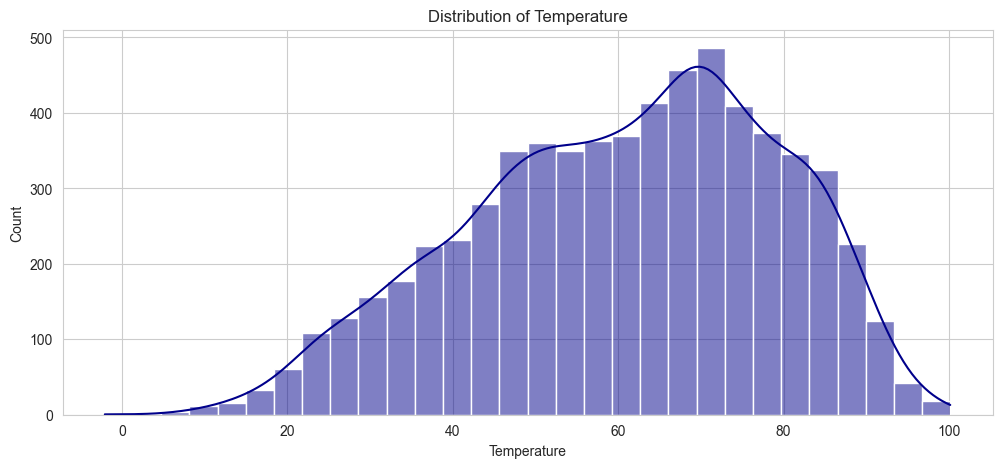

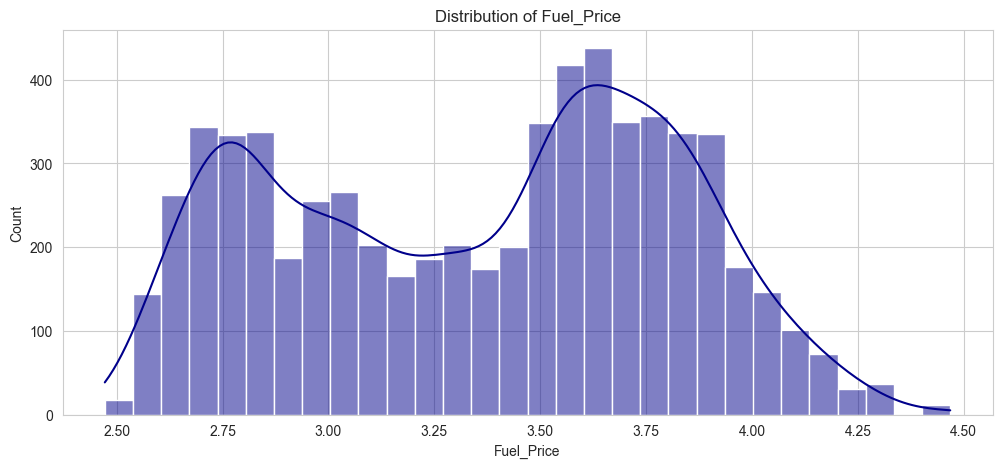

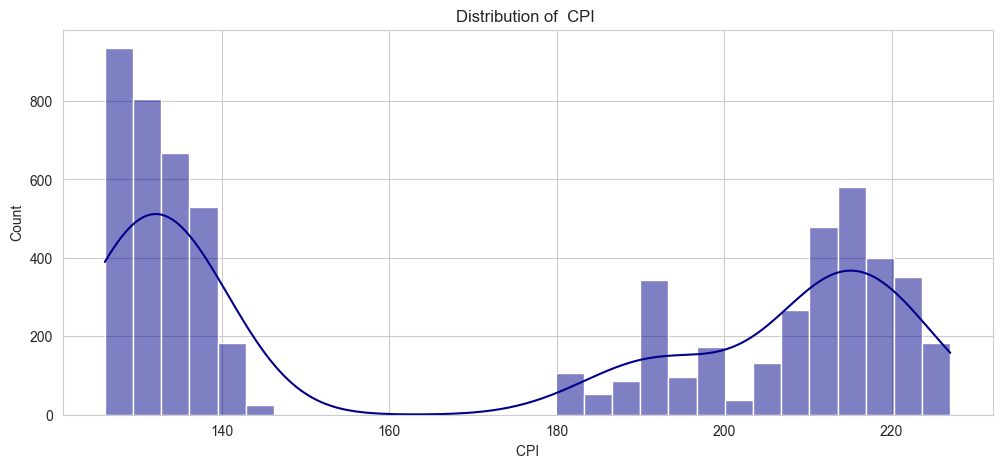

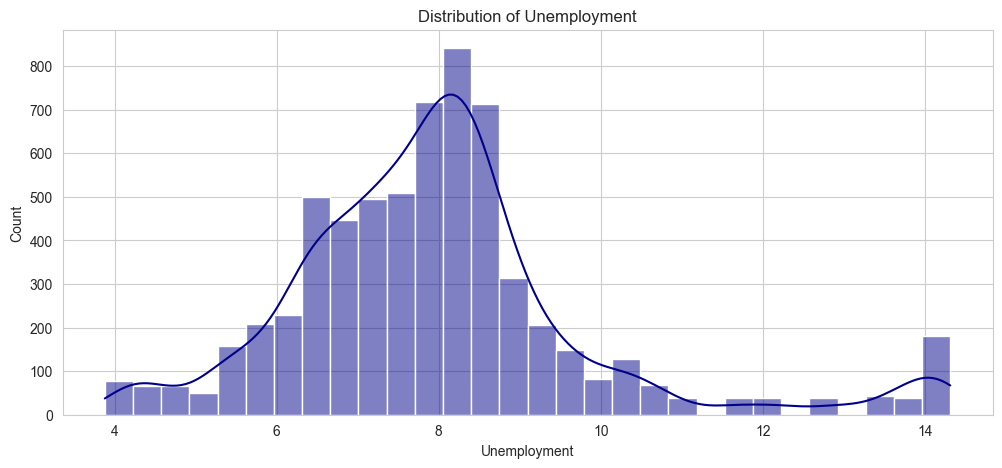

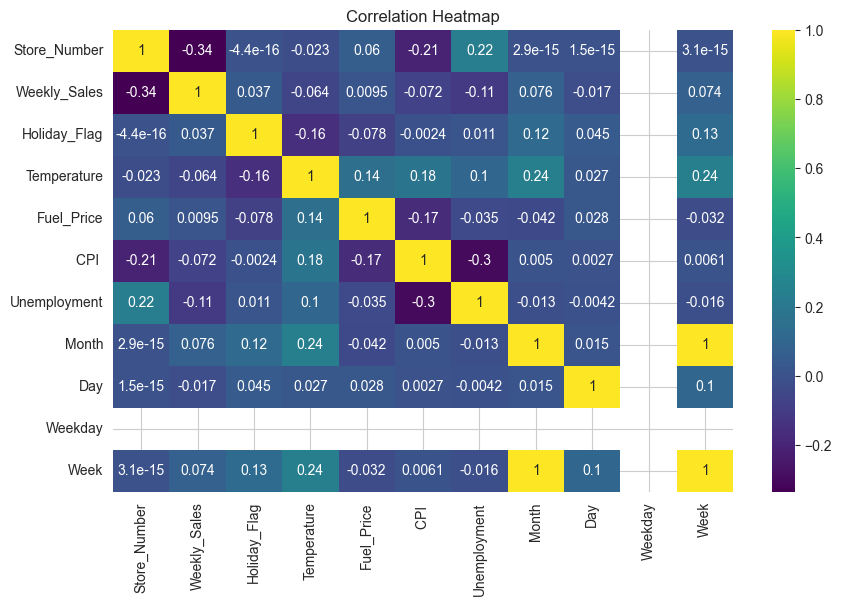

In [35]:
# EDA: Univariate
for col in [ 'Temperature', 'Fuel_Price', ' CPI ', 'Unemployment']:
    plt.figure(figsize=(12, 5))
    sns.histplot(df[col], kde=True, bins=30,color="darkblue")
    plt.title(f'Distribution of {col}')
    plt.show()

# EDA: Bivariate
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='viridis')
plt.title("Correlation Heatmap")
plt.show()



# Weekly sales over time

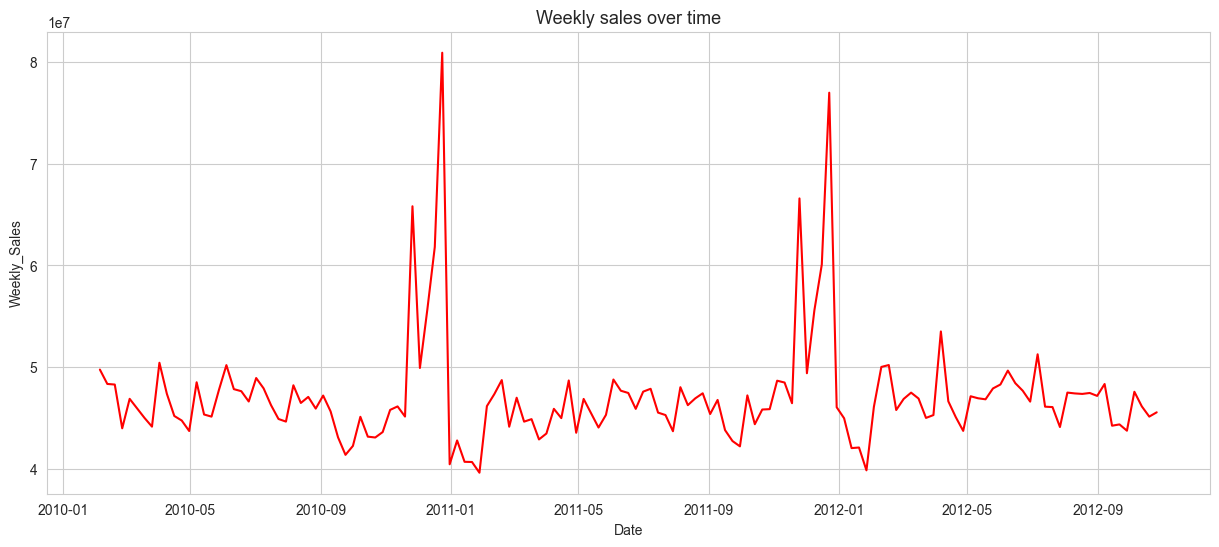

In [36]:
classifi_d=df.groupby("Date")["Weekly_Sales"].sum().reset_index()
classifi_d
plt.figure(figsize=(15,6))
sns.set_style('whitegrid')
sns.lineplot(data=classifi_d,x="Date",y="Weekly_Sales",color="red")
plt.title("Weekly sales over time",size=13)
plt.show()


# Deatiled Interactive Visualization For Better Understanding

In [37]:
import plotly.express as px

fig = px.line(
    classifi_d,
    x='Date',
    y='Weekly_Sales',
    title='Weekly Sales Over Time',
    markers=True,
    labels={'Weekly_Sales': 'Total Sales'}
)

fig.update_traces(line=dict(color='crimson', width=2))
fig.update_layout(
    xaxis_title='Date',
    yaxis_title='Total Weekly Sales',
    template='plotly_white'
)

fig.show()


# Machine Learning

Linear Regression RMSE: 521655.87091795425
Linear Regression R²: 0.15529723846034915
Random Forest RMSE: 104341.53109008346
Random Forest R²: 0.966205180945847


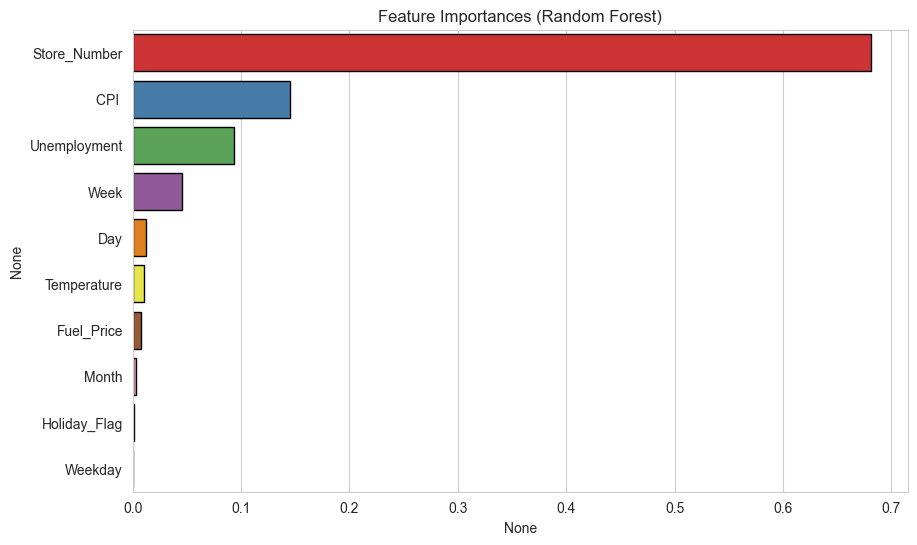

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.95      0.96       639
           1       0.95      0.97      0.96       648

    accuracy                           0.96      1287
   macro avg       0.96      0.96      0.96      1287
weighted avg       0.96      0.96      0.96      1287

Confusion Matrix:
 [[605  34]
 [ 20 628]]
Accuracy Score: 0.958041958041958


In [38]:

# Feature selection
features = ['Store_Number', 'Holiday_Flag', 'Temperature', 'Fuel_Price', ' CPI ',
            'Unemployment', 'Month', 'Day', 'Weekday', 'Week']
target = 'Weekly_Sales'

X = df[features]
y = df[target]

# Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
print("Linear Regression RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_lr)))
print("Linear Regression R²:", r2_score(y_test, y_pred_lr))

# Random Forest Regressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
print("Random Forest RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_rf)))
print("Random Forest R²:", r2_score(y_test, y_pred_rf))

# Feature importances
importances = rf.feature_importances_
feat_imp = pd.Series(importances, index=features).sort_values(ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x=feat_imp, y=feat_imp.index,palette="Set1",edgecolor="black")
plt.title("Feature Importances (Random Forest)")
plt.show()

# Classification: High Sales
df['High_Sales'] = (df['Weekly_Sales'] > df['Weekly_Sales'].median()).astype(int)
X_cls = df[features]
y_cls = df['High_Sales']
X_train_cls, X_test_cls, y_train_cls, y_test_cls = train_test_split(X_cls, y_cls, test_size=0.2, random_state=42)

# Random Forest Classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train_cls, y_train_cls)
y_pred_cls = clf.predict(X_test_cls)

# Evaluation
print("Classification Report:\n", classification_report(y_test_cls, y_pred_cls))
print("Confusion Matrix:\n", confusion_matrix(y_test_cls, y_pred_cls))
print("Accuracy Score:", accuracy_score(y_test_cls, y_pred_cls))

# Predicting With New Data 

In [43]:
# Example new data (replace with actual values)
new_data = pd.DataFrame([{
    'Store_Number': 5,
    'Holiday_Flag': 0,
    'Temperature': 70.2,
    'Fuel_Price': 3.45,
    ' CPI ': 211.45,
    'Unemployment': 7.8,
    'Month': 6,
    'Day': 15,
    'Weekday': 2,
    'Week': 24
}])

# Scale new data using the same scaler
new_data_scaled = scaler.transform(new_data)

# Predict Weekly Sales (Regression)
predicted_sales = rf.predict(new_data_scaled)
print("Predicted Weekly Sales:", predicted_sales[0])

# Predict High/Low Sales Class (Classification)
predicted_class = clf.predict(new_data)
print("Predicted Sales Class (0 = Low, 1 = High):", predicted_class[0])


Predicted Weekly Sales: 306637.81
Predicted Sales Class (0 = Low, 1 = High): 1
